In [2]:
import pandas as pd 
import numpy as np 
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

### Step 1: Read data into DataFrame ###

In [4]:
# Read the data into a dataframe
test_regions = ['NORTHEAST+U.S.', 'SOUTHWEST+U.S.']
#test_short = 'NX'
test_producenames = ['CARROTS', 'APPLES']

# veggies = ['APPLES','APRICOTS','ASPARAGUS','AVOCADOS','BANANAS','BEANS','BEETS','BLACKBERRIES','BLUEBERRIES','BROCCOLI','BRUSSELS+SPROUTS','CABBAGE','CANTALOUPS','CARROTS','CAULIFLOWER','CELERY','CHERRIES','CLEMENTINES','CORN-SWEET','CRANBERRIES', 'CUCUMBERS','EGGPLANT','ENDIVE','GARLIC','GINGER+ROOT','GRAPEFRUIT','GRAPES','HONEYDEWS','KALE+GREENS','KIWIFRUIT','KOHLRABI','LEMONS','LETTUCE%2C+ICEBERG','LETTUCE%2C+ROMAINE','LETTUCE%2C+RED+LEAF','LETTUCE%2C+GREEN+LEAF','LETTUCE%2C+BIBB', 'LIMES','MANGOES','MUSHROOMS','NECTARINES','OKRA','ORANGES','PEACHES','PEARS','PEAS+GREEN','PEPPERS%2C+BELL+TYPE','PINEAPPLES','PLUMS','POTATOES','PUMPKINS','RADISHES','RASPBERRIES','RHUBARB','SPINACH','SQUASH','STRAWBERRIES','SWEET+POTATOES','TOMATOES','TURNIPS','WATERMELONS']
# regions = ['NORTHEAST+U.S.', 'SOUTHEAST+U.S.', 'MIDWEST+U.S.', 'SOUTH+CENTRAL+U.S.', 'SOUTHWEST+U.S.', 'NORTHWEST+U.S.', 'HAWAII', 'ALASKA']
region = 'NORTHEAST+U.S.'
veg = 'APPLES'
variety = 'JONATHAN'

results_df = pd.DataFrame()

# TODO: Modify to loop through every region and veggie
filepath = "./concat_data/" + region + "_" + veg + "_ALL.csv"
df = pd.read_csv(filepath, parse_dates=True, index_col='Date')
df.head()

,Unnamed: 0,Region,Class,Commodity,Variety,Organic,Environment,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,% Marked Local
Date,,,,,,,,,,,,,
2011-01-07,0,NORTHEAST U.S.,FRUITS,APPLES,BRAEBURN,NaN,NaN,per pound,125.0,1.24,0.88,1.49,NaN
2011-01-07,1,NORTHEAST U.S.,FRUITS,APPLES,BRAEBURN,Y,NaN,3 lb bag,112.0,3.00,3.00,3.00,NaN
2011-01-07,2,NORTHEAST U.S.,FRUITS,APPLES,BRAEBURN,Y,NaN,per pound,91.0,1.57,1.49,1.99,NaN
2011-01-07,3,NORTHEAST U.S.,FRUITS,APPLES,FUJI,NaN,NaN,per pound,15.0,1.21,0.88,1.49,NaN
2011-01-07,4,NORTHEAST U.S.,FRUITS,APPLES,FUJI,Y,NaN,3 lb bag,112.0,3.00,3.00,3.00,NaN


### EDA ###
The next section is just for exploring the data and won't be part of the automated pipeline

In [6]:
# Exploring data types and EDA
df.Variety.value_counts()
# TODO: Make a list of the different 'Varieties' and make a diff calculation for each of them

GALA                     2034
RED DELICIOUS            1856
GRANNY SMITH             1413
FUJI                     1303
GOLDEN DELICIOUS         1187
MCINTOSH                  831
HONEYCRISP                663
PINK LADY/CRIPPS PINK     602
BRAEBURN                  560
JONAGOLD                  245
ROME                      219
GINGER GOLD               162
PAULA RED                  64
JONATHAN                   14
Name: Variety, dtype: int64

11
0


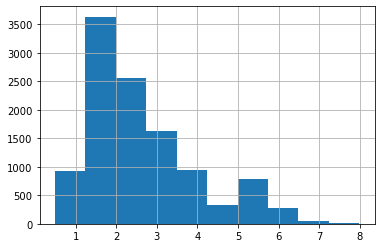

In [8]:
df['Weighted Avg Price'].hist()
print(sum(df['Weighted Avg Price'].isna() == True))
print(sum(df['Weighted Avg Price'] <= 0))

In [10]:
missing_price = df[df['Weighted Avg Price'].isna() == True]
missing_price

,Unnamed: 0,Region,Class,Commodity,Variety,Organic,Environment,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,% Marked Local
Date,,,,,,,,,,,,,
NaT,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,1661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,2570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,4756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,5884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,7095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,8387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,9718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### END EDA ###
The following code will go in the automated script.

Data seems to all be there, the null entries seem to be caused by null rows in the csv during the scrape, so we can drop those rows.

In [12]:
df.columns

Index(['Unnamed: 0', 'Region', 'Class', 'Commodity', 'Variety', 'Organic',
       'Environment', 'Unit', 'Number of Stores', 'Weighted Avg Price',
       'Low Price', 'High Price', '% Marked Local'],
      dtype='object')

In [14]:
# Drop null rows
df.drop(df[df.index.isna() == True].index, inplace=True)
print(sum(df.index.isna() == True))
# Drop Unnamed column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

KeyError: '[] not found in axis'

### Step 2: Calculate averages ###
The following columns will be generated:
- 10 yr average: average of 10 price points, 1 for each num of years back (price 1 yr ago, price 2yr ago, etc.)
- Price 3 mo ago
- Price 1 mo ago
- 10 yr average pct change
- Pct change: price 3 mo ago and price now
- Pct change: price 1 mo ago and price now

In [ ]:
# Create the appropriate timedeltas
"""
Following function taken from https://stackoverflow.com/questions/765797/python-timedelta-in-years
Given the number of years ago from from_date, get the date that was exactly that many years ago
"""
def yearsago(years, from_date=None):
    if from_date is None:
        from_date = datetime.now()
    return from_date - relativedelta(years=years)

def monthsago(months, from_date=None):
    if from_date is None:
        from_date = datetime.now()
    return from_date + relativedelta(months=(-months))

### Today ###
Get relevant info for the prices today such as the date and average price (which will be used to calculate pct change)

In [301]:
# TODO: This will be datetime.now() in production
current_day = datetime.today()
orig_today = datetime(current_day.year, current_day.month, current_day.day)
today = datetime(current_day.year, current_day.month, current_day.day)
while not sum(df.index == today) > 0:
        today -= timedelta(days=1)
if today != orig_today: # replace with datetime.now()
    print("No new data for {} {}, using most recent price from {}".format(veg, region, str(today)))
today_df = df.loc[today]
price_today = np.mean(today_df['Weighted Avg Price'])
print("Price today: $" + str(round(price_today,2)))

No new data for APPLES NORTHEAST+U.S., using most recent price from 2021-01-29 00:00:00
Price today: $2.55


#### 10 yr average ###

In [302]:
# NOTE: Using the nearest Friday for testing, but in production the from_date should be null, the function will automatically use the current day (assuming we run the script every Friday, when USDA data is updated)
df_10yr = pd.DataFrame()
asterisk = False
for i in range(10,-1,-1):
    year_exists = True
    date_back = yearsago(i, from_date=today)
    orig_date_back = date_back
    # Scoot back to the most recent date that contains data
    while not sum(df.index == date_back) > 0:
        date_back -= timedelta(days=1)
        if orig_date_back - date_back >= timedelta(days=365):
            print("No data for {} years back".format(i))
            asterisk = True
            year_exists = False
            break
    if year_exists:
        df_piece = df[df.index == date_back]
        df_10yr = pd.concat([df_10yr, df_piece], axis=0)
df_10yr.index.value_counts()
        

2021-01-29    34
2020-01-24    34
2018-01-26    32
2019-01-25    30
2017-01-27    29
2016-01-29    29
2015-01-23    27
2014-01-24    26
2013-01-25    24
2012-01-27    23
2011-01-28    21
Name: Date, dtype: int64

In [303]:
# We lose the commodity info when we do this. Make sure to hold on to the fact that this is apples, northeast
df_10yr_avg = df_10yr.groupby(df_10yr.index).mean()
df_10yr_avg

,Environment,Number of Stores,Weighted Avg Price,Low Price,High Price,% Marked Local
Date,,,,,,
2011-01-28,NaN,243.428571,2.230476,2.057143,2.348571,NaN
2012-01-27,NaN,347.739130,2.674783,2.416087,2.924783,NaN
2013-01-25,NaN,364.750000,2.680417,2.397917,2.972917,NaN
2014-01-24,NaN,440.307692,2.589231,2.242692,3.000769,2.75
2015-01-23,NaN,405.000000,2.380741,2.072222,2.951111,NaN
2016-01-29,NaN,217.172414,2.885172,2.527241,3.161034,37.00
2017-01-27,NaN,294.551724,2.386552,2.140690,2.611724,NaN
2018-01-26,NaN,257.968750,2.980313,2.709063,3.223750,36.50
2019-01-25,NaN,274.666667,2.834000,2.412667,3.048667,34.80


In [304]:
df_10yr_avg.index[0]

Timestamp('2011-01-28 00:00:00')

In [305]:
# Calculate new columns (averages and pct changes)
if df_10yr_avg.index[0] > yearsago(10, from_date=today):
    print("Data does not contain a price from 10 yrs ago for {} {} {}, using the earliest price point within 10 years that can find for pct change calculation".format(veg, region, variety))
price_10yr_ago = df_10yr_avg.iloc[0]['Weighted Avg Price']
final_10yr_avg = np.mean(df_10yr_avg['Weighted Avg Price'])
print(region, veg, variety, "10 yr average: $" + str(round(final_10yr_avg, 2)))

NORTHEAST+U.S. APPLES JONATHAN 10 yr average: $2.61


#### 3 mo and 1 mo average ####

In [306]:
# Get data from closest to exactly 3 months ago as possible
date_back_3mo = monthsago(3, from_date=today)
while not sum(df.index == date_back_3mo) > 0:
    date_back_3mo -= timedelta(days=1)
df_3mo = df[df.index == date_back_3mo]
print(df_3mo)
# Get data from closest to exactly 1 month ago as possible
date_back_1mo = monthsago(1, from_date=today)
while not sum(df.index == date_back_1mo) > 0:
    date_back_1mo -= timedelta(days=1)
df_1mo = df[df.index == date_back_1mo]
print(df_1mo)

                    Region   Class Commodity                Variety Organic  \
Date                                                                          
2020-10-23  NORTHEAST U.S.  FRUITS    APPLES                   FUJI     NaN   
2020-10-23  NORTHEAST U.S.  FRUITS    APPLES                   FUJI     NaN   
2020-10-23  NORTHEAST U.S.  FRUITS    APPLES                   FUJI       Y   
2020-10-23  NORTHEAST U.S.  FRUITS    APPLES                   FUJI       Y   
2020-10-23  NORTHEAST U.S.  FRUITS    APPLES                   GALA     NaN   
2020-10-23  NORTHEAST U.S.  FRUITS    APPLES                   GALA     NaN   
2020-10-23  NORTHEAST U.S.  FRUITS    APPLES                   GALA     NaN   
2020-10-23  NORTHEAST U.S.  FRUITS    APPLES                   GALA     NaN   
2020-10-23  NORTHEAST U.S.  FRUITS    APPLES                   GALA       Y   
2020-10-23  NORTHEAST U.S.  FRUITS    APPLES                   GALA       Y   
2020-10-23  NORTHEAST U.S.  FRUITS    APPLES        

In [307]:
final_3mo_avg = np.mean(df_3mo['Weighted Avg Price'])
final_1mo_avg = np.mean(df_1mo['Weighted Avg Price'])
print(region, veg, "3 months ago: $" + str(round(final_3mo_avg, 2)))
print(region, veg, "1 months ago: $" + str(round(final_1mo_avg, 2)))

NORTHEAST+U.S. APPLES 3 months ago: $2.6
NORTHEAST+U.S. APPLES 1 months ago: $2.95


In [308]:
def pct_change(oldprice, newprice):
    return ((newprice - oldprice)/oldprice)*100

In [309]:
# Calculate percent changes
# TODO: Ask about 10 yr. Right now going to go exactly 10 yrs back just like the other ones
pct_change_10yr = pct_change(price_10yr_ago, price_today)
pct_change_3mo = pct_change(final_3mo_avg, price_today)
pct_change_1mo = pct_change(final_1mo_avg, price_today)
new_cols = ['Region', 'Commodity', '10yr_avg', '3mo_ago', '1mo_ago', 'pct_change (10yr)', 'pct_change (3mo)', 'pct_change (1mo)', 'price_today', '10_yr asterisk']
vals = [region, veg, final_10yr_avg, final_3mo_avg, final_1mo_avg, pct_change_10yr, pct_change_3mo, pct_change_1mo, price_today, asterisk]
results_dict = dict(zip(new_cols, vals))
print(results_dict)

{'Region': 'NORTHEAST+U.S.', 'Commodity': 'APPLES', '10yr_avg': 2.6095915584684377, '3mo_ago': 2.604117647058823, '1mo_ago': 2.950571428571428, 'pct_change (10yr)': 14.233058723062204, 'pct_change (3mo)': -2.157217077027332, 'pct_change (1mo)': -13.645839860104017, 'price_today': 2.5479411764705877, '10_yr asterisk': False}


In [310]:
results_df = results_df.append(results_dict, ignore_index=True)

In [311]:
# Delete old data no longer needed (+10yrs back)

In [312]:
# Construct a new df where columns are the different measurements and each row is a diff commodity (outside of big for loop)

In [313]:
# Save to csv or Mongo
results_df

,10_yr asterisk,10yr_avg,1mo_ago,3mo_ago,Commodity,Region,pct_change (10yr),pct_change (1mo),pct_change (3mo),price_today
0,0.0,2.609592,2.950571,2.604118,APPLES,NORTHEAST+U.S.,14.233059,-13.64584,-2.157217,2.547941
